In [17]:
from sklearn.datasets import load_iris # To load the input Dataset

# Import the Input Data
iris = load_iris()
X = iris.data # features from the dataset
y = iris.target # The target dataset to be predicted

feature_names = iris.feature_names # Column names of the features in the dataset
target_names = iris.target_names # Column name of the target to be predicted in the dataset
type(X) # Feature values are usually used as numpy arrays due to many associated benifits with numpy arrays

numpy.ndarray

In [13]:
from sklearn.model_selection import train_test_split
# Split the input Dataset randomly into training and test sub-sets (20% of dataset is assigned to test sub-set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [14]:
# import the algorithmic model to be used
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 

classifier = DecisionTreeClassifier() # Can try out with this algorithmic model to see if it improves prediction accuracy
# Initialize the algorithmic model by supplying its parameters
knn = KNeighborsClassifier(n_neighbors=3) # How many classes to classify the features into - 3 types of flowers
knn.fit(X_train, y_train) # Train the model on training dataset
y_pred = knn.predict(X_test) # Get predictions for the test dataset features from the model to measure performance

# Model performance can be improved by using different alogprithmic models, tunning its parameters, tuning the test and train dataset sizes etc.

In [15]:
from sklearn import metrics # To evaluate performance from model predictions and actual target value

print(metrics.accuracy_score(y_test, y_pred)) # Calculate accuracy of predictions of our model using availabel Test Dataset

0.9666666666666667


In [18]:
# Get predictions for data not included in the dataset - no way to say if these predictions are right or wrong
sample = [[3, 5, 4, 2], [2, 3, 5, 4]]
predictions = knn.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print('predictions: ', pred_species)

predictions:  ['versicolor', 'virginica']


In [20]:
# Model Persistence - Save the Trained Model for Future Uses
from joblib import dump, load # To save model as binary file and load a model from a binary file
 
dump(knn, 'mlbrain.joblib') # Save our KNN model as 'mlbrain.joblib' binary file

['mlbrain.joblib']

In [22]:
model = load('mlbrain.joblib') # Load the saved model from the binary file
model.predict(X_test)
sample = [[3, 5, 4, 2], [2, 3, 5, 4]]
predictions = model.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print('predictions: ', pred_species)

predictions:  ['versicolor', 'virginica']


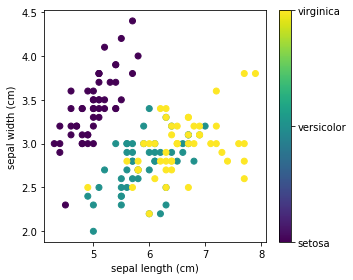

In [24]:
from sklearn.datasets import load_iris 
iris = load_iris() 
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#chart configurations
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

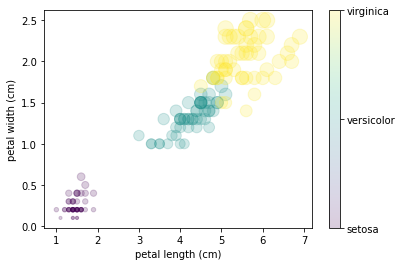

In [25]:
features = iris.data.T

plt.scatter(features[2], features[3], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis') #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);
plt.colorbar(ticks=[0, 1, 2], format=formatter)